In [2]:
# Import the pandas library as pd for easy referencing.
import pandas as pd

# Import Plotly Express as px for simplified plotting.
import plotly.express as px

# Import Plotly Graph Objects as go for more customization in plotting.
import plotly.graph_objects as go


In [5]:
# Reading the transformed data from a CSV file into a pandas dataframe
data = pd.read_csv("transformed_data.csv")

# Reading the raw data from a CSV file into another pandas dataframe
data2 = pd.read_csv("raw_data.csv")

## Displaying the first few rows of the dataset

In [9]:
print(data.head())


  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [8]:
# Display the first few rows of the dataframe
print(data2.head())  # Output the head of the dataframe for quick overview

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

## Count the occurrences of each country in the dataset

In [11]:
# and find the mode, i.e., the most frequently occurring value.
data["COUNTRY"].value_counts().mode()


0    294
Name: COUNTRY, dtype: int64

The mode value is 294, indicating the most common occurrence. We'll utilize this value to divide the sum of all samples pertaining to the Human Development Index, GDP per capita, and population. Next, let's proceed to create a new dataset by merging the required columns from both datasets

# Aggregating the data

In [12]:
# Extracting unique country codes and names
code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()

# Lists to store aggregated values
hdi = []  # Human Development Index
tc = []   # Total Cases
td = []   # Total Deaths
sti = []  # Stringency Index
population = data["POP"].unique().tolist()  # Population
gdp = []  # GDP per capita

# Loop through each country
for i in country:
    # Calculating aggregated values for HDI, Total Cases, Total Deaths, and Stringency Index
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum() / 294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum() / 294)
    # Adjusting population by dividing by the mode value
    population.append((data2.loc[data2["location"] == i, "population"]).sum() / 294)

# Creating a DataFrame to store the aggregated data
aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)),
                               columns=["Country Code", "Country", "HDI",
                                        "Total Cases", "Total Deaths",
                                        "Stringency Index", "Population"])
# Displaying the first few rows of the aggregated data
print(aggregated_data.head())


  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0      165875.0   
1          ALB      Albania  0.600765    1071951.0       31056.0   
2          DZA      Algeria  0.754000    4893999.0      206429.0   
3          AND      Andorra  0.659551     223576.0        9850.0   
4          AGO       Angola  0.418952     304005.0       11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


In [13]:
# Sorting data to display countries with the highest total cases first
data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)  # Sorting the data by total cases in descending order
print(data.head())  # Printing the top entries after sorting


    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


<ipython-input-26-aa51a3cb5be0>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




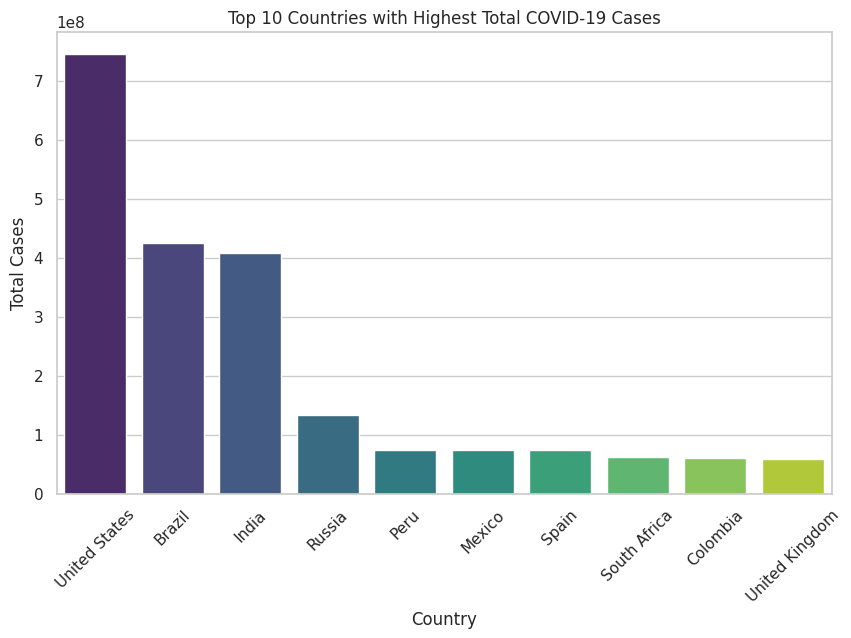

In [26]:
#Top 10 countries with highest total cases

import seaborn as sns

# Selecting the top 10 countries with highest total COVID-19 cases
top_10_countries = data.head(10)

# Setting up the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating a bar plot with gradient color for better attractiveness
sns.barplot(x='Country', y='Total Cases', data=top_10_countries, palette="viridis")

# Adding title and labels
plt.title('Top 10 Countries with Highest Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [24]:
# Creating a more visually appealing bar plot to visualize total COVID-19 cases by country
figure = px.bar(data,
                y='Total Cases',
                x='Country',
                title="Countries with Highest Covid Cases",
                color='Total Cases',  # Color bars based on total cases
                color_continuous_scale=px.colors.sequential.Plasma,  # Using a plasma color scale for better visualization
                labels={'Total Cases': 'Total Cases', 'Country': 'Country'},  # Customizing axis labels
                template='plotly_dark'  # Using a dark theme template for a modern look
               )

# Adding axis labels and title for better readability
figure.update_xaxes(title_text="Country")
figure.update_yaxes(title_text="Total Cases")

# Displaying the plot
figure.show()

In [27]:
# Creating a visually appealing bar plot to visualize total COVID-19 deaths by country
figure = px.bar(data,
                y='Total Deaths',
                x='Country',
                title="Countries with Highest Deaths",
                color='Total Deaths',  # Color bars based on total deaths
                color_continuous_scale=px.colors.sequential.Reds,  # Using a red color scale for emphasis
                labels={'Total Deaths': 'Total Deaths', 'Country': 'Country'},  # Customizing axis labels
                template='plotly_dark'  # Using a dark theme template for a modern look
               )

# Adding axis labels and title for better readability
figure.update_xaxes(title_text="Country")
figure.update_yaxes(title_text="Total Deaths")

# Displaying the plot
figure.show()

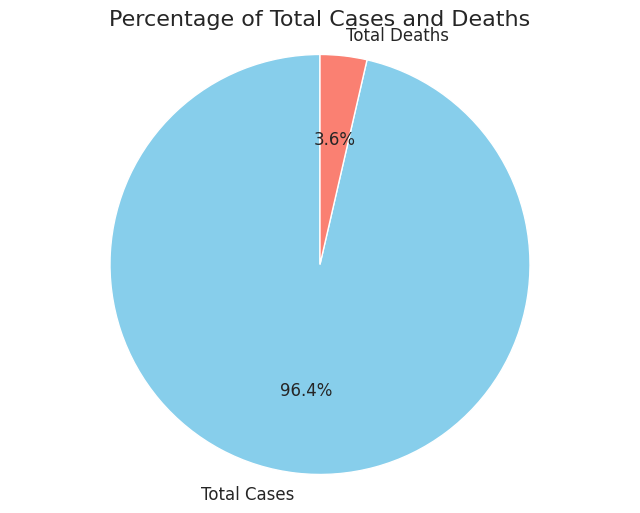

In [40]:
# Calculating total cases and total deaths

cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

# Creating labels and values for the pie chart
labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a pie chart to visualize the percentage of total cases and deaths
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, textprops={'fontsize': 12})
plt.title('Percentage of Total Cases and Deaths', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Displaying the plot
plt.show()
